In [58]:
import math
import sympy
import matplotlib.pyplot as plt

# Задется значение экспоненты для подсчета функции капиталовооруженности
exp = math.exp(1)

# Для использования sympy для вычислений сохраняем в качестве доступного символа k
k = sympy.symbols('k')

In [62]:
def solow_swan_model():
    # Задаются изначальные параметры модели
    prod_func = input('Введите производственную функцию в формате "5*K^(1/3)*L^(2/3)": ')
    alpha = int(prod_func.split('^')[1][1:4].split('/')[0])/int(prod_func.split('^')[1][1:4].split('/')[1])
    u = input('Введите долю выбывших за год основных производственных фондов в формате "0.1": ')
    v = input('Введите годовой темп прироста числа занятых в формате "0.03": ')
    p = input('Введите норму накопления в формате "0.2": ')

    # Вывод в консоль введенных значений для проверки
    print(f'\nПроизводственная функция: {prod_func}')
    print(f'Доля выбывших за год основных производственных фондов: u={u}')
    print(f'Годовой темп прироста числа занятых: v={v}')
    print(f'Норма накопления: p={p}')

    # Находим функцию производительности труда
    labour_prod = ''.join(prod_func.split('*')[:2]).replace('K', 'k')
    print(f'\nПроизводительнось труда: {labour_prod}')

    # Для вычисления стационарного уровня капиталовооруженности используем функцию вида
    # -lamda*ke + p*f(ke) = 0
    print('\nУстановление капиталовооруженности на постоянном уровне ke')
    capital_ratio = f'-{float(u)+float(v)}*ke+{float(p)*int(labour_prod[0])}*{labour_prod[1:].replace("k", "ke")}'
    print(f'{capital_ratio}=0')

    # Вычисление постоянного уровня капиталовооруженности при помощи sympy
    capital_ratio_eq = sympy.parsing.sympy_parser.parse_expr(capital_ratio.replace('ke', 'k').replace('^', '**'))
    solutions = sympy.solve(capital_ratio_eq)
    result_ke = list(filter(lambda x: x != 0.0, solutions))[0]
    print(f'\nПостоянный уровень капиталовооружнности ke={result_ke}')

    # Для вычисления точки перегиба используем фунцию вид
    # -lambda + p*alpha*k~^(1-alpha) = 0
    inflection_point_eq = f'-{float(u)+float(v)}+{labour_prod.split("^")[-1]}*k~^-{prod_func.split("^")[-1]}'
    print(f'\n{inflection_point_eq}=0')

    # Вычисление постоянного уровня капиталовооруженности при помощи sympy
    inflection_point_eq_parsed = inflection_point_eq.replace('k~', 'k')
    solutions = sympy.solve(inflection_point_eq_parsed)
    result_kt = solutions[0]
    print(f'Точка перегиба k~={result_kt}')

    # Для отрисовки траекторий капиталовооруженности задаем
    x = range(0, 20) # временные интервалы

    k1 = (0 + result_kt) / 2 # значение уровня капиталовооруженности ниже точки перегиба
    k2 = (result_ke + result_kt) / 2 # значение уровня капиталовооруженности между точкой перегиба и стационарной точкой
    k3 = result_ke + 5 # значение уровня капиталовооруженности выше стационарной точки

    # Траектории капиталовооруженности при заданных k + в стационарной точке
    y1 = [(result_ke**(1-alpha)+(k1**(1-alpha)-result_ke**(1-alpha))*exp**(-(1-alpha)*(float(u)+float(v))*i))**(1/(1-alpha)) for i in x]
    y2 = [(result_ke**(1-alpha)+(k2**(1-alpha)-result_ke**(1-alpha))*exp**(-(1-alpha)*(float(u)+float(v))*i))**(1/(1-alpha)) for i in x]
    y3 = [(result_ke**(1-alpha)+(k3**(1-alpha)-result_ke**(1-alpha))*exp**(-(1-alpha)*(float(u)+float(v))*i))**(1/(1-alpha)) for i in x]
    ye = [(result_ke**(1-alpha)+(result_ke**(1-alpha)-result_ke**(1-alpha))*exp**(-(1-alpha)*(float(u)+float(v))*i))**(1/(1-alpha)) for i in x]

    # Отрисовка траекторий капиталовооруженности
    fig, ax = plt.subplots()
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Траектории капиталовооруженности')

    ax.plot(x, y1, label=f'k1={k1}')
    ax.plot(x, y2, label=f'k2={k2}')
    ax.plot(x, ye, label=f'ke={result_ke}')
    ax.plot(x, y3, label=f'k3={k3}')

    ax.legend()

    plt.show()

    # Рассмотрение модели экономики при alpha + 10%
    # Перерасчет стационарной точки капиталовооруженности и точки перегиба
    new_capital_ratio = f'-{float(u)+float(v)}*ke+{float(p)*int(labour_prod[0])}*ke^({alpha*1.1})'
    new_capital_ratio_eq = sympy.parsing.sympy_parser.parse_expr(new_capital_ratio.replace('ke', 'k').replace('^', '**'))
    solutions = sympy.solve(new_capital_ratio_eq)
    new_result_ke = list(filter(lambda x: x != 0.0, solutions))[0]

    new_inflection_point_eq = f'-{float(u)+float(v)}+{alpha*1.1}*k~^-{1 - alpha*1.1}'
    new_inflection_point_eq_parsed = new_inflection_point_eq.replace('k~', 'k')
    solutions = sympy.solve(new_inflection_point_eq_parsed)
    new_result_kt = solutions[0]

    # Отрисовка траекторий капиталовооруженности
    x = range(0, 20)

    k1 = (0 + result_kt) / 2 # для первого уровня капиталовооруженности используем значение изначального состояния экономики
    k2 = (0+ new_result_kt) / 2 # для второго уровня капиталовооруженности используем значение нового состояния экономики

    y1 = [(result_ke**(1-alpha)+(k1**(1-alpha)-result_ke**(1-alpha))*exp**(-(1-alpha)*(float(u)+float(v))*i))**(1/(1-alpha)) for i in x]
    y2 = [(new_result_ke**(1-alpha)+(k2**(1-alpha)-new_result_ke**(1-alpha))*exp**(-(1-alpha)*(float(u)+float(v))*i))**(1/(1-alpha)) for i in x]

    fig, ax = plt.subplots()
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Изменение траектории капиталовооруженности при alpha + 10%')

    ax.plot(x, y1, label=f'alpha={alpha}')
    ax.plot(x, y2, label=f'alpha={alpha*1.1}')

    ax.legend()

    plt.show()

    # Рассмотрение модели экономики при p > alpha и p < alpha
    # Перерасчет стационарной точки капиталовооруженности и точки перегиба
    # Обнуление alpha
    alpha = int(prod_func.split('^')[1][1:4].split('/')[0])/int(prod_func.split('^')[1][1:4].split('/')[1])
    new_p = alpha + float(p)

    new_capital_ratio = f'-{float(u)+float(v)}*ke+{float(new_p)*int(labour_prod[0])}*ke^({alpha*1.1})'
    new_capital_ratio_eq = sympy.parsing.sympy_parser.parse_expr(new_capital_ratio.replace('ke', 'k').replace('^', '**'))
    solutions = sympy.solve(new_capital_ratio_eq)
    new_result_ke = list(filter(lambda x: x != 0.0, solutions))[0]

    new_inflection_point_eq = f'-{float(u)+float(v)}+{float(new_p)*alpha}*k~^-{1 - alpha*1.1}'
    new_inflection_point_eq_parsed = new_inflection_point_eq.replace('k~', 'k')
    solutions = sympy.solve(new_inflection_point_eq_parsed)
    new_result_kt = solutions[0]

    # Отрисовка траекторий капиталовооруженности
    x = range(0, 20)

    k1 = (0 + result_kt) / 2 # для первого уровня капиталовооруженности используем значение изначального состояния экономики
    k2 = (0+ new_result_kt) / 2 # для второго уровня капиталовооруженности используем значение нового состояния экономики

    y1 = [(result_ke**(1-alpha)+(k1**(1-alpha)-result_ke**(1-alpha))*exp**(-(1-alpha)*(float(u)+float(v))*i))**(1/(1-alpha)) for i in x]
    y2 = [(new_result_ke**(1-alpha)+(k2**(1-alpha)-new_result_ke**(1-alpha))*exp**(-(1-alpha)*(float(u)+float(v))*i))**(1/(1-alpha)) for i in x]

    fig, ax = plt.subplots()
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Изменение траектории капиталовооруженности при p < alpha и p > alpha')

    ax.plot(x, y1, label=f'p={p}')
    ax.plot(x, y2, label=f'p={new_p}')

    ax.legend()

    plt.show()

Введите производственную функцию в формате "5*K^(1/3)*L^(2/3)": 5*K^(1/5)*L^(4/5)
Введите долю выбывших за год основных производственных фондов в формате "0.1": 0.1
Введите годовой темп прироста числа занятых в формате "0.03": 0.03
Введите норму накопления в формате "0.2": 0.2

Производственная функция: 5*K^(1/5)*L^(4/5)
Доля выбывших за год основных производственных фондов: u=0.1
Годовой темп прироста числа занятых: v=0.03
Норма накопления: p=0.2

Производительнось труда: 5k^(1/5)

Установление капиталовооруженности на постоянном уровне ke
-0.13*ke+1.0*ke^(1/5)=0

Постоянный уровень капиталовооружнности ke=12.8106394879531

-0.13+(1/5)*k~^-(4/5)=0
Точка перегиба k~=1.71339819162336


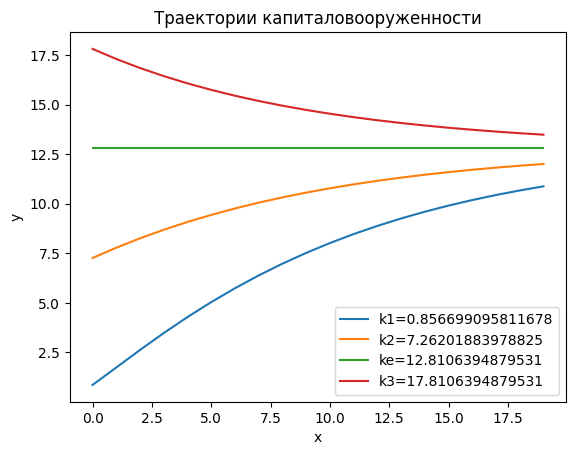

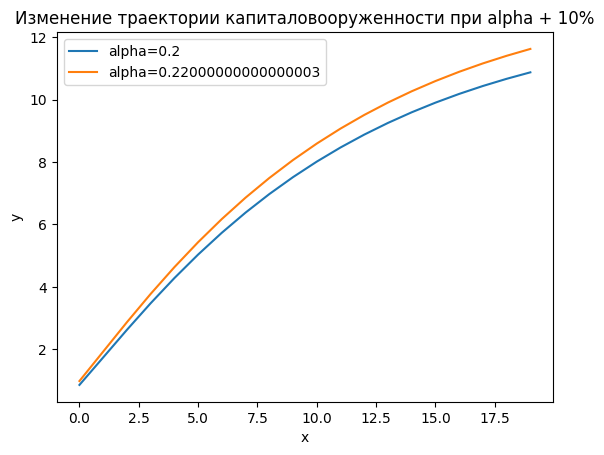

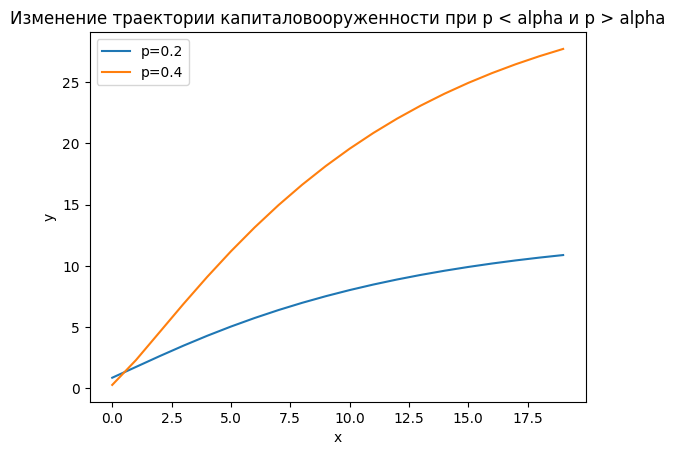

In [63]:
solow_swan_model()